In [3]:
import pandas as pd
import numpy as np
from matplotlib import dates
import matplotlib.pyplot as plt 
import datetime
from matplotlib.dates import DateFormatter, DayLocator
import seaborn as sns


ruta=r'https://raw.githubusercontent.com/lasheralberto/data/main/spain_energy_market.csv'
df=pd.read_csv(ruta)
df['datetime']=pd.to_datetime(df['datetime'])
df['date']=df['datetime'].dt.date
df['año']=df['datetime'].dt.year
df['mes']=df['datetime'].dt.month
df['dia']=df['datetime'].dt.day

df['hora']=df['datetime'].dt.hour
df=df.drop(columns='datetime')


In [4]:
variables=df.groupby(by='name')['name'].count()
variables=variables.to_frame()
variables


,name
name,
Demanda programada PBF total,1825
Demanda real,1825
Energía asignada en Mercado SPOT Diario España,1826
Energía asignada en Mercado SPOT Diario Francia,1826
Generación programada PBF Carbón,1823
Generación programada PBF Ciclo combinado,1793
Generación programada PBF Eólica,1825
Generación programada PBF Gas Natural Cogeneración,1826
Generación programada PBF Nuclear,1825


In [433]:
from functools import reduce

data_1=df[df['name']=='Demanda programada PBF total']
data_2=df[df['name']=='Demanda real']
data_3=df[df['name']=='Energía asignada en Mercado SPOT Diario España']
data_4=df[df['name']=='Energía asignada en Mercado SPOT Diario Francia']
data_5=df[df['name']=='Generación programada PBF Carbón']
data_6=df[df['name']=='Generación programada PBF Ciclo combinado']
data_7=df[df['name']=='Generación programada PBF Eólica']
data_8=df[df['name']=='Generación programada PBF Gas Natural Cogeneración']
data_9=df[df['name']=='Generación programada PBF Nuclear']
data_10=df[df['name']=='Generación programada PBF Solar fotovoltaica']
data_11=df[df['name']=='Generación programada PBF Turbinación bombeo']
data_12=df[df['name']=='Generación programada PBF UGH + no UGH']
data_13=df[df['name']=='Generación programada PBF total']

data_1=data_1[['name','value','date']]
data_2=data_2[['name','value','date']]
data_3=data_3[['name','value','date']]
data_3=data_3[['name','value','date']]
data_4=data_4[['name','value','date']]
data_5=data_5[['name','value','date']]
data_6=data_6[['name','value','date']]
data_7=data_7[['name','value','date']]
data_8=data_8[['name','value','date']]
data_9=data_9[['name','value','date']]
data_10=data_10[['name','value','date']]
data_11=data_11[['name','value','date']]
data_12=data_12[['name','value','date']]
data_13=data_13[['name','value','date']]

#merging all the dfs into one
dfs=[data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12,data_13]
new_dfs = [i.rename(columns = dict(zip(i.columns.difference(['date']),i.columns.difference(['date']) + f"_data_{e}"))) for e,i in enumerate(dfs,1)]
#setting the name of the columns
df_final = reduce(lambda left,right: pd.merge(left,right,on='date'), new_dfs)
df_final=df_final.set_index('date')
#filtering the columns
filter_col = [col for col in df_final if col.startswith('value')]
df_final=df_final[filter_col]
df_final



,value_data_1,value_data_2,value_data_3,value_data_4,value_data_5,value_data_6,value_data_7,value_data_8,value_data_9,value_data_10,value_data_11,value_data_12,value_data_13
date,,,,,,,,,,,,,
2014-01-01,620107.7,28191.597222,566081.9,171917.3,2498.7,4497.5,277443.9,75993.1,144654.6,7027.3,15226.2,87564.8,642771.8
2014-01-02,659865.2,28465.180556,586355.6,164386.5,19741.4,14541.1,237323.1,83437.4,146177.8,12817.8,21979.8,94432.6,658078.5
2014-01-03,632536.8,26860.493056,609612.9,166611.2,1288.0,3555.6,329506.6,65023.9,145055.3,12532.5,3192.2,92236.2,680564.6
2014-01-05,572534.1,23905.541667,531020.2,170611.0,2687.0,6297.0,223942.0,74151.3,135624.0,14555.6,5165.4,103851.1,598661.4
2014-01-06,695639.1,29859.201389,538580.1,154664.1,74823.0,13118.9,157202.9,84881.1,146389.6,13703.0,15446.4,124957.4,669914.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25,612702.5,26514.395833,476122.2,211013.4,75146.0,46904.8,75764.6,71929.2,145139.2,12802.5,9245.9,97526.4,562606.4
2018-12-26,649103.9,28521.423611,482798.8,245317.4,84528.1,71015.8,59887.6,75584.5,145171.2,14083.1,14364.0,114102.3,611465.3
2018-12-27,639571.2,28624.194444,490658.5,231141.3,68721.4,34335.1,120618.6,76964.0,145380.0,14287.2,8838.0,88123.0,589771.5


In [434]:
df_final.describe(include='all')

,value_data_1,value_data_2,value_data_3,value_data_4,value_data_5,value_data_6,value_data_7,value_data_8,value_data_9,value_data_10,value_data_11,value_data_12,value_data_13
count,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.00000,1789.000000,1789.000000
mean,662891.438290,28546.240359,513910.869592,276232.438625,95015.417719,33322.027781,141732.224483,67994.978703,150696.741196,21552.008664,9365.67194,90508.563723,650171.535495
std,62562.410336,2741.665690,65834.950123,63186.355925,66919.959404,30010.430858,71604.853402,6840.091306,19623.933740,6831.500589,6268.81523,43152.189164,69284.648214
min,493489.300000,21196.722222,325337.700000,133090.200000,165.400000,70.000000,24612.200000,38940.500000,83788.800000,4952.900000,36.00000,24460.000000,457837.600000
25%,623671.600000,27041.541667,469428.500000,232828.000000,27705.500000,10992.000000,84474.700000,64743.100000,141757.600000,15742.000000,5240.00000,59442.100000,603192.200000
50%,667131.600000,28534.722222,512728.300000,279599.300000,101338.600000,29352.200000,125886.600000,68697.000000,153011.700000,22634.000000,7934.80000,78239.300000,652392.500000
75%,705879.700000,30667.888889,556311.300000,323735.600000,151465.100000,40188.200000,186011.200000,72214.300000,168687.100000,27613.400000,12224.10000,109727.800000,692835.400000
max,826559.500000,35306.409722,780989.000000,519124.400000,229783.700000,223586.000000,398629.800000,89009.800000,175915.500000,34294.500000,43603.50000,252780.200000,875595.100000


array([[<AxesSubplot:title={'center':'value_data_1'}>,
        <AxesSubplot:title={'center':'value_data_2'}>,
        <AxesSubplot:title={'center':'value_data_3'}>,
        <AxesSubplot:title={'center':'value_data_4'}>],
       [<AxesSubplot:title={'center':'value_data_5'}>,
        <AxesSubplot:title={'center':'value_data_6'}>,
        <AxesSubplot:title={'center':'value_data_7'}>,
        <AxesSubplot:title={'center':'value_data_8'}>],
       [<AxesSubplot:title={'center':'value_data_9'}>,
        <AxesSubplot:title={'center':'value_data_10'}>,
        <AxesSubplot:title={'center':'value_data_11'}>,
        <AxesSubplot:title={'center':'value_data_12'}>],
       [<AxesSubplot:title={'center':'value_data_13'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

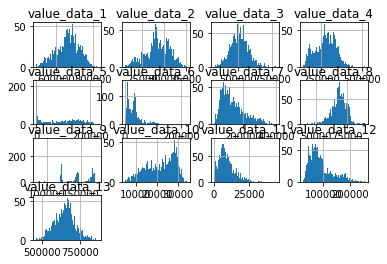

In [7]:
%matplotlib inline
df_final.hist(bins=100)

<ipython-input-427-4522a4d09be6>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,8))


<Figure size 720x576 with 0 Axes>

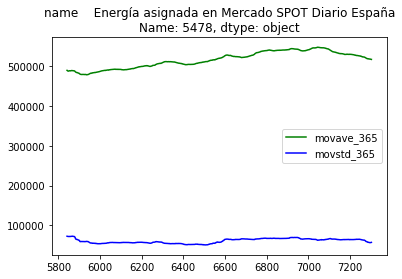

<Figure size 720x576 with 0 Axes>

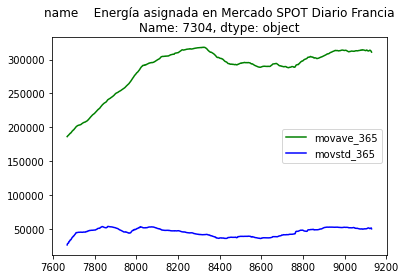

<Figure size 720x576 with 0 Axes>

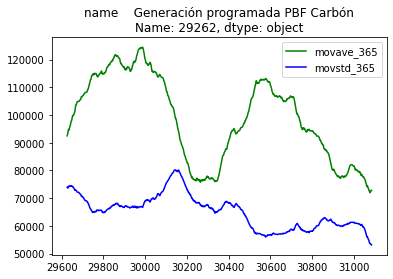

<Figure size 720x576 with 0 Axes>

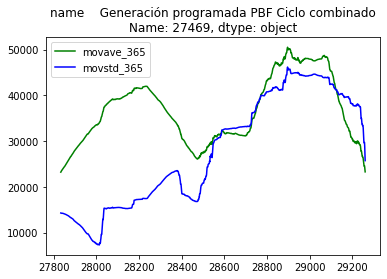

<Figure size 720x576 with 0 Axes>

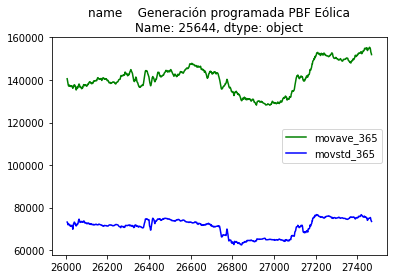

<Figure size 720x576 with 0 Axes>

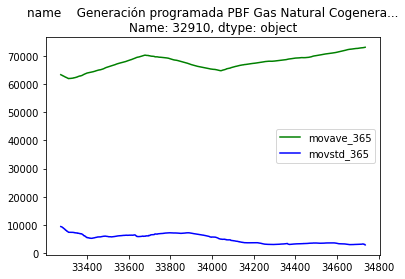

<Figure size 720x576 with 0 Axes>

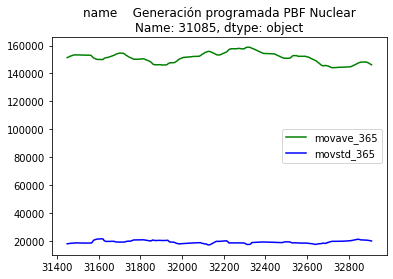

<Figure size 720x576 with 0 Axes>

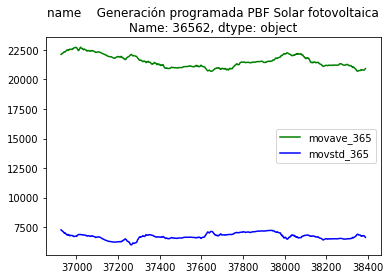

<Figure size 720x576 with 0 Axes>

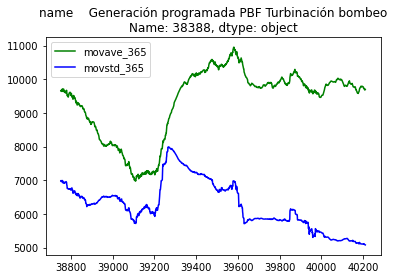

<Figure size 720x576 with 0 Axes>

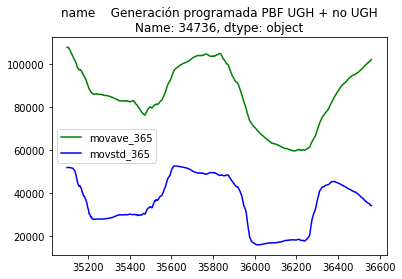

<Figure size 720x576 with 0 Axes>

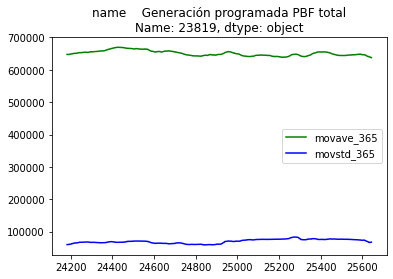

In [427]:
def graphs(data):
    import random
    fortitle=data.iloc[0,data.columns.get_indexer(['name'])]
    #media a 7 dias pivotal
    data[['movave_7','movstd_7']]=data.value.rolling(7).agg([np.mean,np.std])

    
    data[["movave_30", "movstd_30"]] = data.value.rolling(30).agg([np.mean, np.std])
    data[["movave_90", "movstd_90"]] = data.value.rolling(90).agg([np.mean, np.std])
    data[["movave_365", "movstd_365"]] = data.value.rolling(365).agg([np.mean, np.std])
 
    plt.figure(figsize=(10,8))
    data[['movave_365','movstd_365']].plot(color=['green','blue'])
    plt.title('Stdeviation'f'{fortitle}')
    
    plt.title(f'{fortitle}')
    
listagraficos=[data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12,data_13]
for i in listagraficos:
    graphs(i)  


<AxesSubplot:>

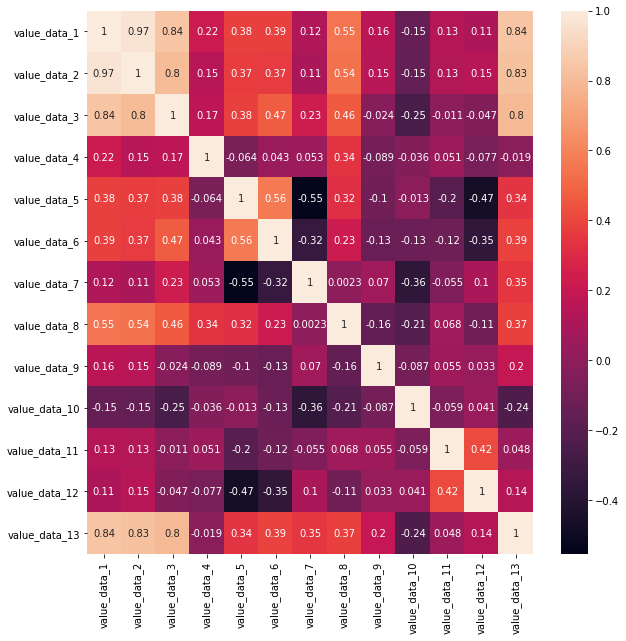

In [10]:
corr_matrix=df_final.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)

In [11]:
from pandas.plotting import scatter_matrix

#scatter_matrix(df_final,figsize=(20,20))

In [8]:
#let's split the data to test
def split_train(data,test_ratio):
    np.random.seed(32)
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set,test_set=split_train(df_final,0.2)

len(train_set),len(test_set)


(1432, 357)

In [9]:
#the same as our previous function
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df_final,test_size=0.2,random_state=42)

this split could be consistent in large datasets, but it is not in our dataset since we only have nearly 2000 thousand rows. We take the risk of introducing some bias to the predictions. We should choose a sample that is representative of the total population.

In [16]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

#dimension de los datos
nfil,ncol=df_final.shape
X=df_final[df_final.columns[4:12]]
y=df_final[df_final.columns[0]]

#estadarizamos la matriz de variables predictoras

scaler=preprocessing.StandardScaler().fit(X)
X_scaled=pd.DataFrame(scaler.transform(X),columns=X.columns)

#regresion lineal de y sobre X

model=LinearRegression().fit(X_scaled,y)

R2=r2_score(y,model.predict(X_scaled))
y_pred=model.predict(X)

coef_df=pd.DataFrame(model.coef_,X.columns,columns=['coef'])

print('termino independiente:',model.intercept_)
print('pendientes',model.coef_,sep='\n')
print('R2',R2)
coef_df





termino independiente: 662891.4382895472
pendientes
[42519.52239744 22924.09545058 39991.49591019 23626.07440141
 18315.86147037 14744.02446322  8172.17186339 28631.82771764]
R2 0.7647197166039911


,coef
value_data_5,42519.522397
value_data_6,22924.095451
value_data_7,39991.495910
value_data_8,23626.074401
value_data_9,18315.861470
value_data_10,14744.024463
value_data_11,8172.171863
value_data_12,28631.827718


In [17]:
#making predictions 
df_pred=pd.DataFrame({'Actual':y,'Predicted':y_pred})
df_pred

,Actual,Predicted
date,,
2014-01-01,620107.7,1.848548e+10
2014-01-02,659865.2,1.838536e+10
2014-01-03,632536.8,2.035923e+10
2014-01-05,572534.1,1.668128e+10
2014-01-06,695639.1,1.836230e+10
...,...,...
2018-12-25,612702.5,1.471546e+10
2018-12-26,649103.9,1.565441e+10
2018-12-27,639571.2,1.582060e+10


In [18]:
import time
import itertools
def backward(predictors):   
    results = []   
    for subconjunto in itertools.combinations(predictors, len(predictors)-1):    
        regr = model.fit(X[list(subconjunto)],y)
        R2 = r2_score(y,regr.predict(X[list(subconjunto)]))
        results.append({"model":regr, "R2":R2,"subconjunto":list(subconjunto)})
    models = pd.DataFrame(results)
    best_model = models.loc[np.argmax(np.array(models['R2']))]   
    print("Procesados ", models.shape[0], "modelos de", len(predictors)-1,
          "predictores.")
    return best_model

# Obtener los conjuntos anidados de predictores usando backward-selection:
models_bwd = pd.DataFrame(columns=["R2", "model","subconjunto"], index = range(1,len(X.columns)))
tic = time.time()
predictors = X.columns
while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["subconjunto"]
toc = time.time()
print("Tiempo total:", (toc-tic), "segundos.")

Procesados  8 modelos de 7 predictores.
Procesados  7 modelos de 6 predictores.
Procesados  6 modelos de 5 predictores.
Procesados  5 modelos de 4 predictores.
Procesados  4 modelos de 3 predictores.
Procesados  3 modelos de 2 predictores.
Procesados  2 modelos de 1 predictores.
Tiempo total: 0.17409539222717285 segundos.


In [88]:
#let's see more in detail our model, and we also are going to detect if we have multicollinearity in our variables. If VIF is over 10 then most likely there is multicollinearity.

models_bwd['VIF']=1/(1-models_bwd['R2'])
models_bwd

,R2,model,subconjunto,VIF
1,0.145214,LinearRegression(),[value_data_5],1.16988
2,0.303407,LinearRegression(),"[value_data_5, value_data_7]",1.43556
3,0.481711,LinearRegression(),"[value_data_5, value_data_7, value_data_12]",1.92943
4,0.58467,LinearRegression(),"[value_data_5, value_data_7, value_data_8, val...",2.40773
5,0.646829,LinearRegression(),"[value_data_5, value_data_7, value_data_8, val...",2.83149
6,0.715981,LinearRegression(),"[value_data_5, value_data_6, value_data_7, val...",3.52089
7,0.751605,LinearRegression(),"[value_data_5, value_data_6, value_data_7, val...",4.02585


In [31]:
models_bwd.loc[7,'model'].intercept_

models_bwd.iloc[6,1].coef_

array([0.10468791])

In [32]:
# Definir una función que me devuelve el mejor modelo de regresión lineal que consigo añadiendo 
# una nueva variable predictora al conjunto de datos, usando como medida de rendimiento el R2:
def forward(predictors):
    remaining_predictors = [p for p in X.columns if p not in predictors]
    results = []
    model = LinearRegression()
    for p in remaining_predictors:
        regr = model.fit(X[list(predictors+[p])],y)
        R2 = r2_score(y,regr.predict(X[list(predictors+[p])]))
        results.append({"model":regr, "R2":R2,"subconjunto":list(predictors+[p])})  
    models = pd.DataFrame(results)
    best_model = models.loc[np.argmax(np.array(models['R2']))]   
    print("Procesados ", models.shape[0], "modelos de", len(predictors)+1, 
          "predictores.")   
    return best_model

    # Obtener los conjuntos anidados de predictores usando forward-selection:
models_fwd = pd.DataFrame(columns=["R2", "model","subconjunto"])
predictors = []
tic = time.time()
for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["subconjunto"]
toc = time.time()
print("Tiempo total:", (toc-tic), "segundos.")

Procesados  8 modelos de 1 predictores.
Procesados  7 modelos de 2 predictores.
Procesados  6 modelos de 3 predictores.
Procesados  5 modelos de 4 predictores.
Procesados  4 modelos de 5 predictores.
Procesados  3 modelos de 6 predictores.
Procesados  2 modelos de 7 predictores.
Procesados  1 modelos de 8 predictores.
Tiempo total: 0.17757844924926758 segundos.


In [47]:
models_fwd

,R2,model,subconjunto
1,0.298530,LinearRegression(),[value_data_8]
2,0.370669,LinearRegression(),"[value_data_8, value_data_6]"
3,0.448839,LinearRegression(),"[value_data_8, value_data_6, value_data_9]"
4,0.527418,LinearRegression(),"[value_data_8, value_data_6, value_data_9, val..."
5,0.572139,LinearRegression(),"[value_data_8, value_data_6, value_data_9, val..."
6,0.715981,LinearRegression(),"[value_data_8, value_data_6, value_data_9, val..."
7,0.751605,LinearRegression(),"[value_data_8, value_data_6, value_data_9, val..."
8,0.764720,LinearRegression(),"[value_data_8, value_data_6, value_data_9, val..."


In [113]:

print('Coeficientes: ', models_fwd.loc[6,'model'].coef_)
print('Intercept:',models_fwd.loc[6,'model'].intercept_)

Coeficientes:  [4.64435285 1.01026513 0.88696268 0.41322857 0.19988186 0.3757892 ]
Intercept: 110522.3539693437


Text(0, 0.5, '$R^2$')

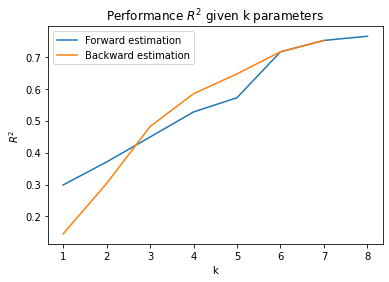

In [112]:
x=list(models_fwd.index)
x1=list(models_bwd.index)
plt.plot(x,models_fwd['R2'])
plt.plot(x1,models_bwd['R2'])
plt.title('Performance $R^2$ given k parameters')
plt.legend(labels=['Forward estimation','Backward estimation'])
plt.xlabel('k')
plt.ylabel('$R^2$')

In [117]:
#vemos cómo al introducir la variable value_data_5, el performance del modelo crece significativamente
models_fwd['subconjunto'][6]



['value_data_12',
 'value_data_5',
 'value_data_6',
 'value_data_7',
 'value_data_8',
 'value_data_9']

In [339]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV


X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30)
ridge = Ridge(alpha=10000, normalize=True)
ridge.fit(X_train,y_train)
y_pred_Ridge = ridge.predict(X_test)


mean = mean_squared_error(y_test, pred) 
rmse = np.sqrt(mean_squared_error(y_test,pred))
print('Mean squared error in Ridge Regression:',rmse)
print('Intercept',ridge.intercept_)
print('Coeficients',ridge.coef_)
print('R2',ridge.score(X_test,y_test))

df_ridge=pd.DataFrame({'Coef Ridge':ridge.coef_,'Regressors':X.columns})
df_ridge


Mean squared error in Ridge Regression: 62952.994160573726
Intercept 663606.3985765099
Coeficients [ 2.31589223  2.42155594  0.7850741   3.39032462  1.00713979 -0.99120047
  0.93238959  0.62052385]
R2 -0.001303710055266416


,Coef Ridge,Regressors
0,2.315892,value_data_5
1,2.421556,value_data_6
2,0.785074,value_data_7
3,3.390325,value_data_8
4,1.007140,value_data_9
5,-0.991200,value_data_10
6,0.932390,value_data_11
7,0.620524,value_data_12


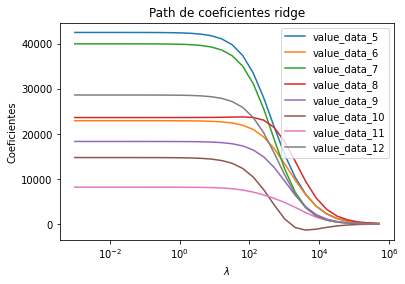

In [287]:
# Path de lambdas

# Rejilla
import numpy as np
alphas = np.exp2(list(range(-10,20)))

# Cálculo del path
from sklearn import linear_model
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_scaled, y)
    coefs.append(ridge.coef_)

# Visualización del path
import matplotlib.pyplot as plt
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Coeficientes')
plt.title('Path de coeficientes ridge')
plt.legend(labels=X_scaled)
plt.show()

As we can see in the graph, as the model it is becoming simpler (lambda higuer) all the variables converges to zero. This means that we cannot explain the dependent variable with one independent variable, and this makes sense because we cannot explain the complex market of energy with one or two variables. On the other hand, by having a more complex model we generate an unbiased model but with high variance. This means that if we construct a very complex model with many regressors, our estimations will fit the regression line perfectly but as we introduce new data to our model or we decide to make predictions we should expect a great variance, harming considerably our forecast capacity. Thus, we must find an equilibrium among bias and variance in order to make good predictions. We have chosen the value for lambda in 1000 where it seems the variables have converged. 


Below we can see the estimations with OLS. As we can see, here we are not penalizing regressors as we do in Ridge regression, and therefore they have greater sign. On the other hand we introduce a more variability in our model since OLS decrease the bias.

In [340]:
# Regresión lineal de y sobre X OLS
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30)

regr=LinearRegression()
model = regr.fit(X_train,y_train)
y_pred_OLS=regr.predict(X_test)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
df_ols=pd.DataFrame({'Coef OLS':model.coef_,'Regressors':X.columns})
df_ols

Intercept: 662906.5064510629
Coefficients: [43136.32812759 22519.75998063 39359.66656486 24015.88659143
 18995.23320304 15355.72527615  8391.75673612 28967.70795632]


,Coef OLS,Regressors
0,43136.328128,value_data_5
1,22519.759981,value_data_6
2,39359.666565,value_data_7
3,24015.886591,value_data_8
4,18995.233203,value_data_9
5,15355.725276,value_data_10
6,8391.756736,value_data_11
7,28967.707956,value_data_12


In [224]:
from sklearn.metrics import mean_squared_error
print('Mean squared error in OLS Regression: ',int(mean_squared_error(y,y_pred)))


Mean squared error in OLS Regression:  324830392413035167744


As we can see the MSE is, as expected, much higuer in OLS than in Ridge Regression. We can confirm it in the graph below: OLS has much more variability as it tries to fit as much as possible every point of data.

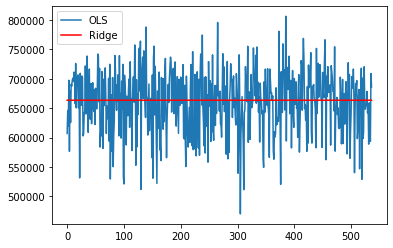

In [341]:
plt.plot(y_pred_OLS)
plt.plot(y_pred_Ridge,color='red')
plt.legend(labels=['OLS','Ridge'])

In [343]:
dataframedata={'OLS_pred':y_pred_OLS[:537],'Ridge':y_pred_Ridge}
dfd=pd.DataFrame(dataframedata)
dfd['dif']=dfd['OLS_pred']-dfd['Ridge']
dfd=dfd.astype('int')

#as we see the predictions are different since we define dif=OLS_pred-Ridge_pred 
print('Misprediction by: ',dfd['dif'].sum())
dfd

Misprediction by:  -1282078


,OLS_pred,Ridge,dif
0,607071,663600,-56528
1,646227,663606,-17379
2,619921,663614,-43693
3,697662,663606,34056
4,576572,663602,-87030
...,...,...,...
532,659167,663612,-4444
533,610575,663611,-53036
534,593716,663590,-69873
535,709051,663589,45462


Regresión RidgeCV 

Intercept 663347.6251185432 

Coeficients [31336.35036374 20121.76112069 28587.53224373 23847.3353537
 15007.92234952  8893.72287274  5898.93313757 23043.23566854] 

R2 RidgeCV 0.7239617491300561 

Mean squared error in Ridge Regression: 61293.647695233856 



,Coef Ridge,Regressors
0,31336.350364,value_data_5
1,20121.761121,value_data_6
2,28587.532244,value_data_7
3,23847.335354,value_data_8
4,15007.922350,value_data_9
5,8893.722873,value_data_10
6,5898.933138,value_data_11
7,23043.235669,value_data_12


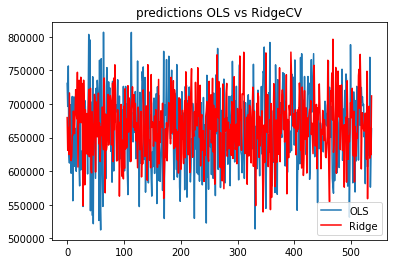

In [369]:
  print('Regresión RidgeCV \n')
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30)
ridgecv = RidgeCV(normalize=True)
ridgecv.fit(X_train,y_train)
y_pred_Ridge = ridgecv.predict(X_test)


mean = mean_squared_error(y_test, pred) 
rmse = np.sqrt(mean_squared_error(y_test,pred))
    
print('Intercept',ridgecv.intercept_,'\n')
print('Coeficients',ridgecv.coef_,'\n')
print('R2 RidgeCV',ridgecv.score(X_test,y_test),'\n')
print('Mean squared error in Ridge Regression:',rmse,'\n')

plt.title('predictions OLS vs RidgeCV')
plt.plot(y_pred_OLS)
plt.plot(y_pred_Ridge,color='red')
plt.legend(labels=['OLS','Ridge'])

df_ridgecv=pd.DataFrame({'Coef Ridge':ridgecv.coef_,'Regressors':X.columns})
df_ridgecv

Let's define a function to easily spot how Ridge regression behaves against different values of the parameter alpha:

Regresión Ridge 

Intercept 662975.2562489505 

Coeficients [2148.98107244 2155.74409151  793.39807787 3110.55272115 1101.6768517
 -765.36756893  698.40875431  809.41135932] 

R2 RidgeCV 0.11589635510300289 

Mean squared error in Ridge Regression: 60860.74587517226 

-------------------------------------------------------------
Regresión lineal de y sobre X OLS 

Intercept: 662496.2024639049 

Coefficients: [42530.44053249 23595.00971285 40039.70244248 24631.64233814
 18711.35076628 16358.65137807  8375.37336542 29447.98955497] 

R2 OLS 0.7423101041122747 

Misprediction by:  272291 

Mean squared error in OLS Regression:  324830392413035167744
Misprediction by:  272291


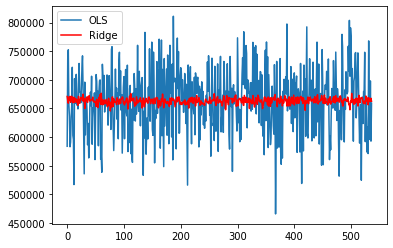

In [365]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression

def comparation(alpha):
    print('Regresión Ridge \n')
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30)
    ridge = Ridge(alpha=alpha,normalize=True)
    ridge.fit(X_train,y_train)
    y_pred_Ridge = ridge.predict(X_test)


    mean = mean_squared_error(y_test, pred) 
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    
    print('Intercept',ridge.intercept_,'\n')
    print('Coeficients',ridge.coef_,'\n')
    print('R2 RidgeCV',ridge.score(X_test,y_test),'\n')
    print('Mean squared error in Ridge Regression:',rmse,'\n')

    df_ridge=pd.DataFrame({'Coef Ridge':ridge.coef_,'Regressors':X.columns})
    df_ridge
    print('-------------------------------------------------------------')

#-------------------------------------
    print('Regresión lineal de y sobre X OLS \n')
    

    X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30)

    regr=LinearRegression()
    model = regr.fit(X_train,y_train)
    y_pred_OLS=regr.predict(X_test)
    print('Intercept:', model.intercept_,'\n')
    print('Coefficients:', model.coef_,'\n')
    print('R2 OLS',model.score(X_test,y_test),'\n')
    df_ols=pd.DataFrame({'Coef OLS':model.coef_,'Regressors':X.columns})
   
    
  
#-------------------------------------
    dataframedata={'OLS_pred':y_pred_OLS[:537],'Ridge':y_pred_Ridge}
    dfd=pd.DataFrame(dataframedata)
    dfd['dif']=dfd['OLS_pred']-dfd['Ridge']
    dfd=dfd.astype('int')
    
#as we see the predictions are different since we define dif=OLS_pred-Ridge_pred 
    print('Misprediction by: ',dfd['dif'].sum(),'\n')


 
    print('Mean squared error in OLS Regression: ',int(mean_squared_error(y,y_pred)))


    plt.plot(y_pred_OLS)
    plt.plot(y_pred_Ridge,color='red')
    plt.legend(labels=['OLS','Ridge'])


    dataframedata={'OLS_pred':y_pred_OLS[:537],'Ridge':y_pred_Ridge}
    dfd=pd.DataFrame(dataframedata)
    dfd['dif']=dfd['OLS_pred']-dfd['Ridge']
    dfd=dfd.astype('int')

#as we see the predictions are different since we define dif=OLS_pred-Ridge_pred 
    print('Misprediction by: ',dfd['dif'].sum())
    dfd
    
    
comparation(10)

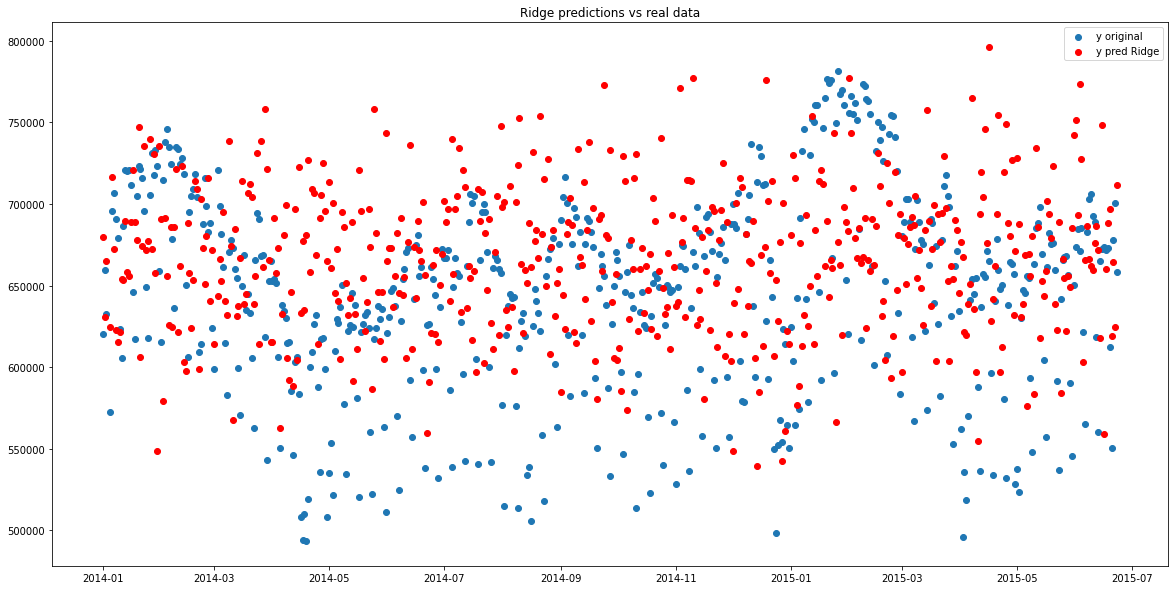

In [426]:
#comparation between real data and Ridge regression
yreal=y[:537].to_frame('y')
yreal['y_pred_ridge']=y_pred_Ridge

plt.figure(figsize=(20,10))
#plt.plot(yreal.index,yreal['y_pred_ridge'])
plt.title('Ridge predictions vs real data')
plt.scatter(yreal.index,yreal['y'])
plt.scatter(yreal.index,yreal['y_pred_ridge'],color='red')
plt.legend(labels=['y original','y pred Ridge'])

